## HomeWork 2 EDA, Data Visualization and Linear Regression Model 

# Due on 9/30/2019: 23:59 pm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading our MPG3 dataset

In [3]:
mpg = pd.read_csv("mpg3.csv")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


In [4]:
mpg.shape

(405, 9)

# Question 1: Check to see if there are any missing values. Fix the missing values by imputing value from the mean. After fixing missing values, you should still have 405 rows

In [5]:
# Type your code here
print(mpg.isnull().any())

print("\n")
print("Yes, there are missing values in mpg, horsepower, weight")

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool


Yes, there are missing values in mpg, horsepower, weight


In [6]:
print(mpg[mpg['mpg'].isnull()].shape)
print(mpg[mpg['horsepower'].isnull()].shape)
print(mpg[mpg['weight'].isnull()].shape)
mpg['mpg'] = mpg['mpg'].fillna( mpg['mpg'].mean())
mpg['horsepower'] = mpg['horsepower'].fillna( mpg['horsepower'].mean())
mpg['weight'] = mpg['weight'].fillna( mpg['weight'].mean())
print(mpg.isnull().any())
print(mpg.shape)

(1, 9)
(6, 9)
(1, 9)
mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool
(405, 9)


# Question 2 : Use Boxplot to see if there are any outliers on ALL of the numerical fields (Hint you should have 402 rows now after outliers removal)

**Type in your code here**

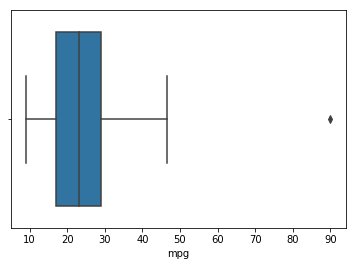

In [7]:
sns.boxplot(x=mpg['mpg'])

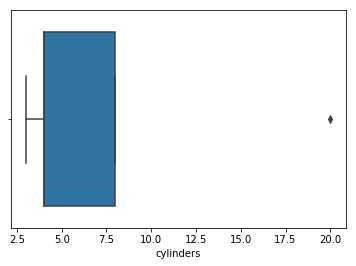

In [8]:
sns.boxplot(x=mpg['cylinders'])

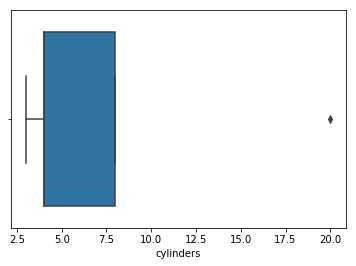

In [9]:
sns.boxplot(x=mpg['cylinders'])

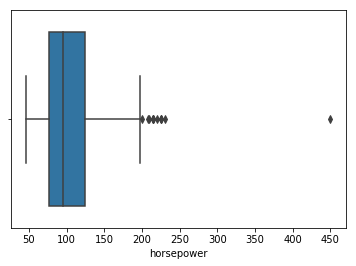

In [10]:
sns.boxplot(x=mpg['horsepower'])

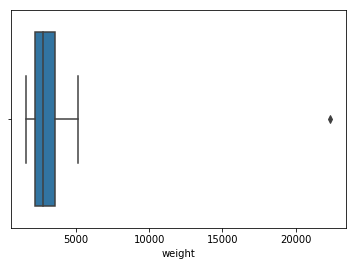

In [11]:
sns.boxplot(x=mpg['weight'])

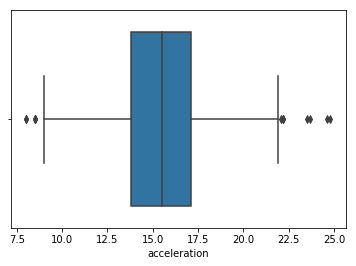

In [12]:
sns.boxplot(x=mpg['acceleration'])

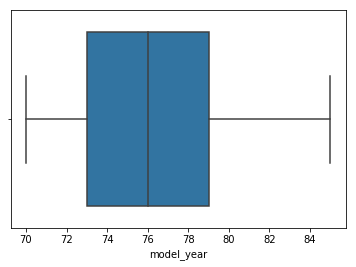

In [13]:
sns.boxplot(x=mpg['model_year'])

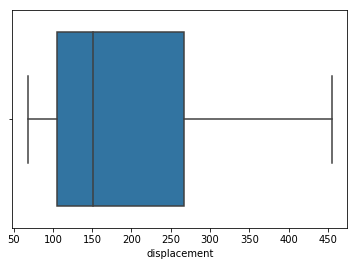

In [14]:
sns.boxplot(x='displacement', data=mpg)

In [15]:
# OR you could simply do it in one line
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,23.645545,5.493827,194.504938,105.593985,3020.866337,15.521481,75.987654
std,8.455124,1.847687,105.231828,42.002541,1280.925042,2.792380,3.746595
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,76.000000,2228.000000,13.800000,73.000000
50%,23.000000,4.000000,151.000000,95.000000,2807.000000,15.500000,76.000000
75%,29.000000,8.000000,267.000000,125.000000,3613.000000,17.100000,79.000000
max,90.000000,20.000000,455.000000,450.000000,22340.000000,24.800000,85.000000


In [16]:
print("Before ", mpg.shape)
mpg = mpg[ (mpg['mpg'] < 80) & (mpg['cylinders'] < 12) & (mpg['weight'] < 20000) & (mpg['horsepower'] < 300)]
print("After ", mpg.shape)

Before  (405, 9)
After  (402, 9)


In [17]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,23.486183,5.455224,193.772388,104.633244,2971.181260,15.551493,75.985075
std,7.801361,1.700590,104.643349,38.439545,846.258635,2.772219,3.720239
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.125000,4.000000,105.000000,76.000000,2226.500000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# Question 3 : Remove any duplicates rows. Hint after removal, you should have 400 rows now

In [18]:
# Show number of rows before
print("Before duplicates removal: ", mpg.shape)

# Type your code here to remove duplicated rows
mpg = mpg.drop_duplicates()

# hint: Google how to remove duplicate rows in pandas dataframe and you will find the link
# https://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.drop_duplicates.html

# Show number of rows before
print("After duplicates removal: ", mpg.shape)

Before duplicates removal:  (402, 9)
After duplicates removal:  (400, 9)


# Question 4: Create a pair plot

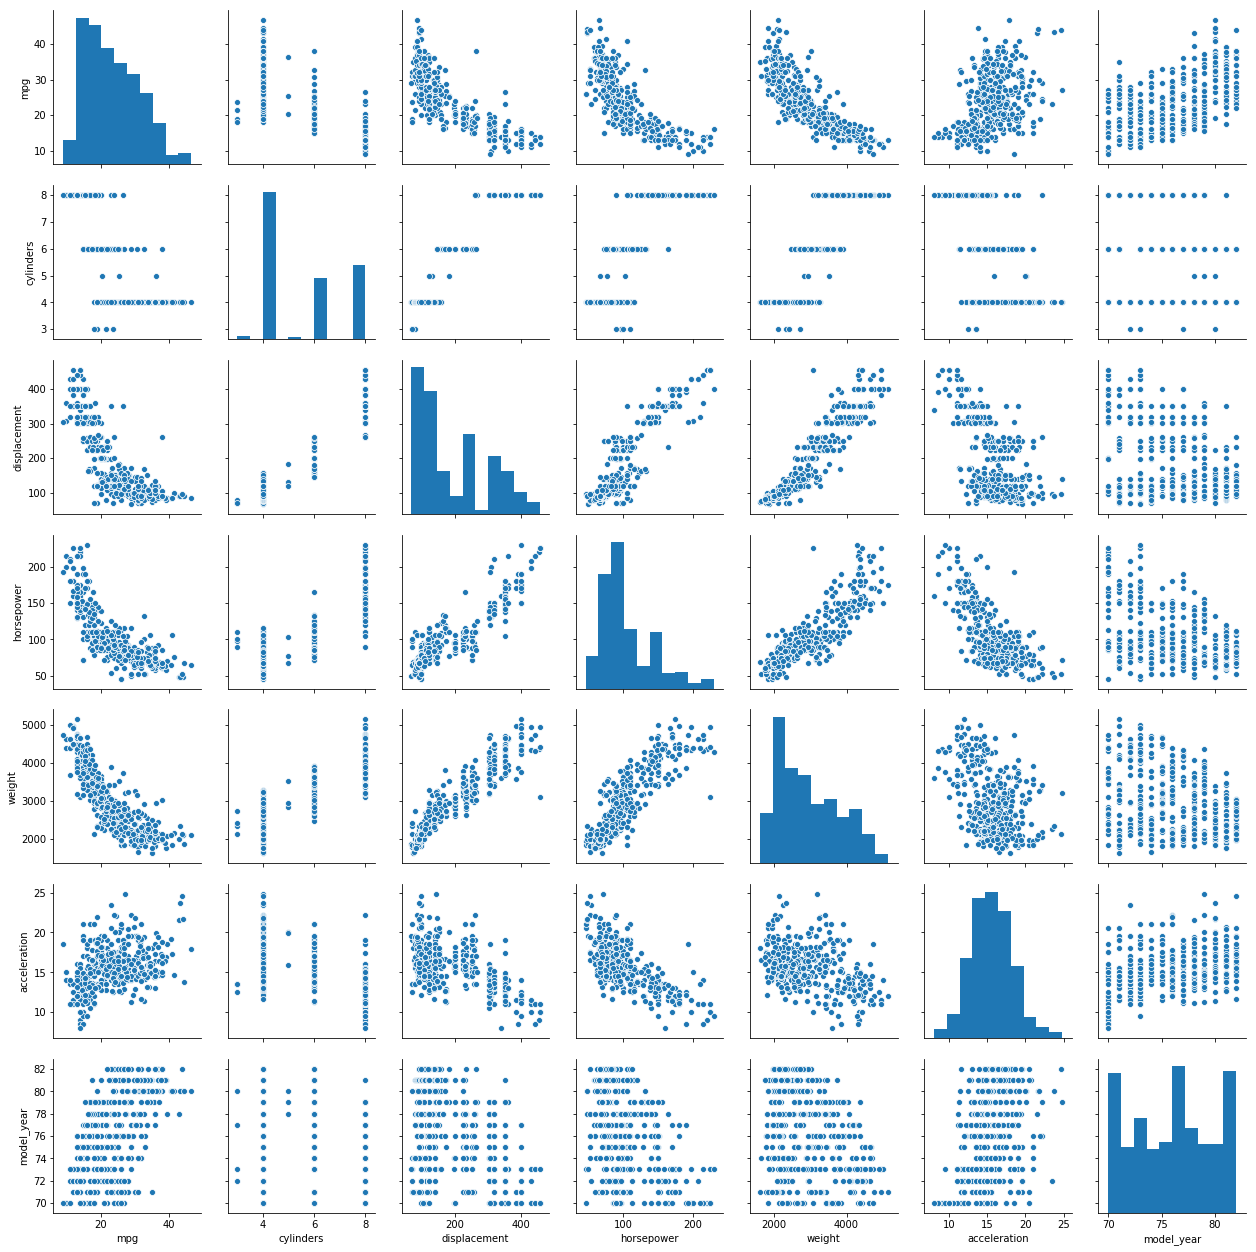

In [19]:
sns.pairplot(mpg)

# Question 5: Create a FacetGrid of a scatter plot of mpg vs weight for different country

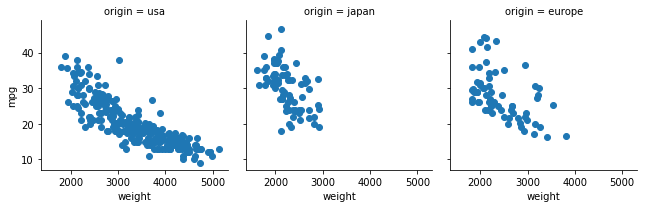

In [20]:
# Type your code here
g = sns.FacetGrid(mpg, col = 'origin')
g = (g.map(plt.scatter, "weight", "mpg").add_legend())

# Now Load the adult income dataset and do some EDA and answer the following questions based on the Adult income dataset

In [21]:
adult = pd.read_csv("adult.data.csv")
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
adult.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

In [23]:
print(adult.shape)
adult.describe()

(32561, 15)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Question 6 : Which two martial-status is most common

In [24]:
adult['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [1]:
# Married-civ-spouse and Never-married are the most common martial-status

# Question 7: Plot the age distribution broken down by different martial-status using a FacetGrid

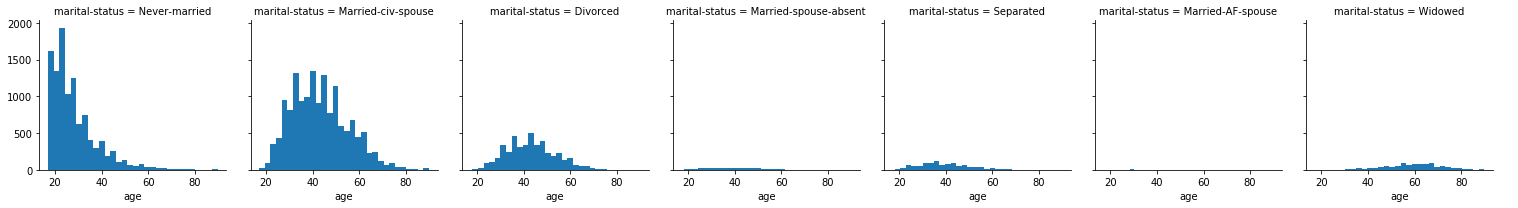

In [25]:
g = sns.FacetGrid(data = adult, col = 'marital-status')
g = g.map(plt.hist, 'age', bins=30).add_legend()

# Question 8: Create a Facet Grid for fnlwgt against age broken down by race and sex. You should have 10 sub-plots

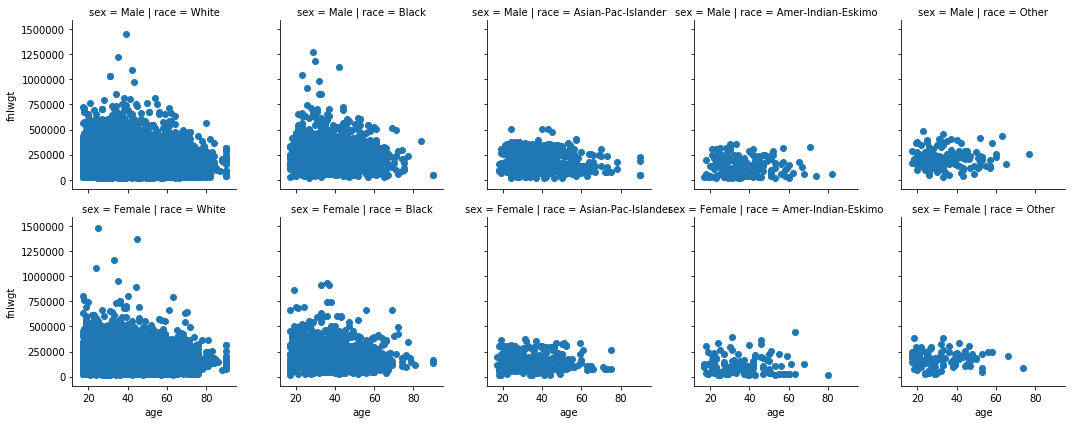

In [26]:
g = sns.FacetGrid(data = adult, col = 'race', row='sex')
g = g.map(plt.scatter, 'age', 'fnlwgt').add_legend()

# Now Load the housing data and answer all the remaining questions based on the housing dataset

In [27]:
housing = pd.read_csv("USA_housing.csv")
housing.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


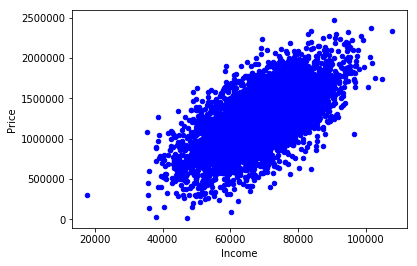

In [28]:
# a scatter plot comparing num_children and num_pets
housing.plot(kind='scatter',x='Income',y='Price',color='blue')
plt.show()

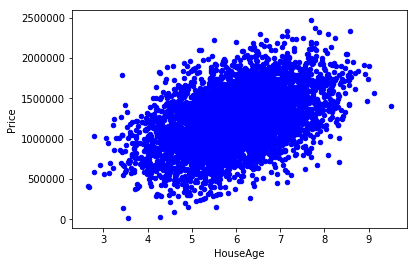

In [29]:
housing.plot(kind='scatter', x = "HouseAge", y = "Price", color = "blue")

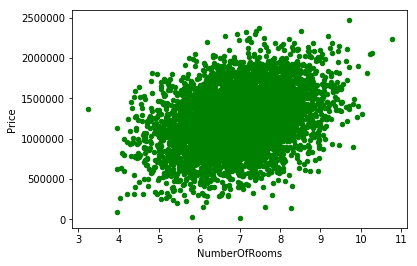

In [30]:
housing.plot(kind='scatter', x = "NumberOfRooms", y = "Price", color = "green")

In [2]:
# Use a pairplot to see all the scatter plots with the numerical variables in one grid

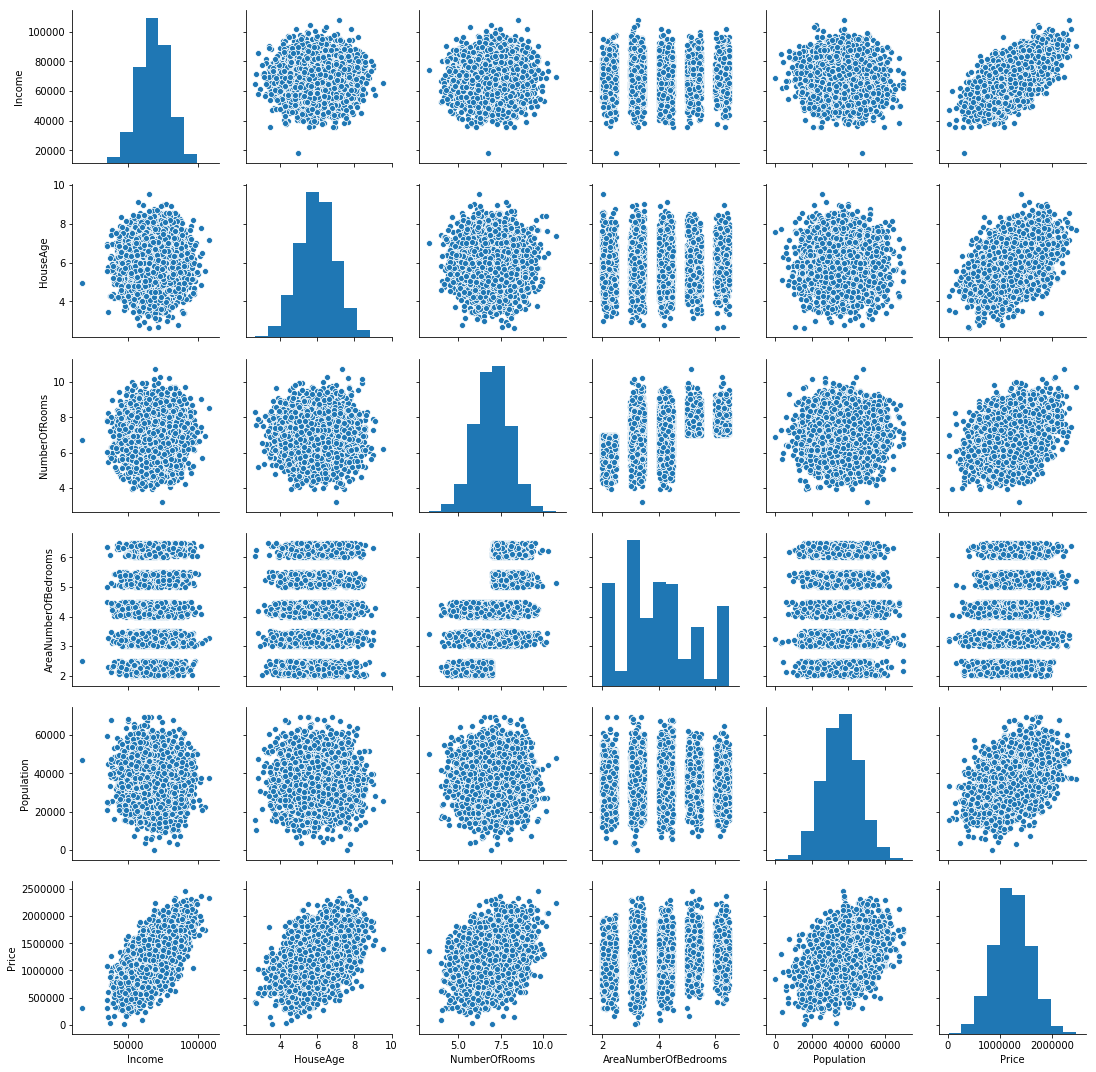

In [31]:
sns.pairplot(housing)

# Question 9: Use a pair plot or individual scatter plots, pick ONE variable that best explains house price

In [32]:
# Type your answer (ie which variable affect the Price the most)
housing.corr()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
HouseAge,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
NumberOfRooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
AreaNumberOfBedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


Pick income because Income has the highest correlation, or the scatter plot shows the strongest linear relationship with the Price from the above pairplot

# Question 10:  Use that variable to build a one-variable Linear Regression model of the house price. Make sure you split the data between Training and Testing set first, Save 20% as your testing data

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [35]:
# Show your work here

X = housing['Income'].values.reshape(-1, 1)
Y = housing['Price'].values.reshape(-1, 1)
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(model.coef_)
print(model.intercept_)

[[21.24368249]]
[-224617.80110797]


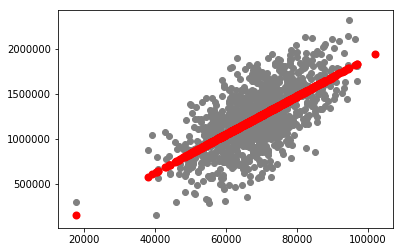

In [36]:
plt.scatter(X_test, Y_test,  color='gray')
plt.scatter(X_test, Y_pred, color='red', linewidth=2)
plt.show()

# Show your R-square and RMSE

In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 219728.3360181176
Mean Squared Error: 74084394120.77266
Root Mean Squared Error: 272184.4854520049
R-squared: 0.4006059806785851


# Question 11: Now do a 10-fold Cross Validation of your model. Does your model pass cross validation?

In [38]:
import random

In [39]:
# Show your work here

Trial 0, R-squared: 0.3909900205145057,  Slope: [[21.32642247]], Intercept: [-228704.10423302],  
Trial 1, R-squared: 0.4077996014893207,  Slope: [[21.03329209]], Intercept: [-207512.96405494],  
Trial 2, R-squared: 0.40158215387350416,  Slope: [[21.0836388]], Intercept: [-213970.00018025],  
Trial 3, R-squared: 0.42374046300672064,  Slope: [[21.19554993]], Intercept: [-221124.1043789],  
Trial 4, R-squared: 0.37958545865796955,  Slope: [[21.39422931]], Intercept: [-235950.04398328],  
Trial 5, R-squared: 0.401193003013426,  Slope: [[21.25711792]], Intercept: [-225285.49256197],  
Trial 6, R-squared: 0.3989220665812496,  Slope: [[21.21741489]], Intercept: [-223275.00451357],  
Trial 7, R-squared: 0.373157689025724,  Slope: [[21.62630654]], Intercept: [-254320.20782108],  
Trial 8, R-squared: 0.43404573164927107,  Slope: [[21.04773684]], Intercept: [-213095.61664769],  
Trial 9, R-squared: 0.4084840131527724,  Slope: [[21.00901438]], Intercept: [-211228.33591284],  


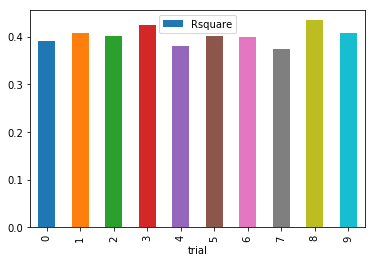

In [40]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

Yes, the model passed cross validation because the performance of the model (R-squared) are of similar values as we used different training and testing dataset

# Question 12: Now pick ONE more variable in addition to the variable you choose from Question 9 and build a two-variables Linear Regression model of the house price. Make sure you split the data into training and testing set first

[[2.12204386e+01 1.60427782e+05]]
[-1181216.65021219]


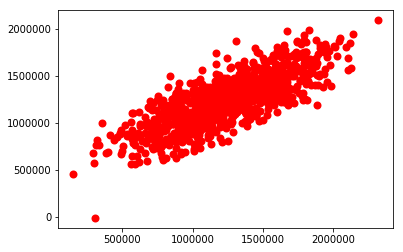

In [42]:
# Show your work here
X = housing[['Income','HouseAge']].values.reshape(-1, 2)
Y = housing['Price'].values.reshape(-1, 1)
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)
model2 = LinearRegression()
model2.fit(X_train, Y_train)
Y_pred = model2.predict(X_test)
print(model2.coef_)
print(model2.intercept_)
plt.scatter(Y_test, Y_pred, color='red', linewidth=2)
plt.show()

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 175582.84518684636
Mean Squared Error: 48062437588.67757
Root Mean Squared Error: 219231.4703428264
R-squared: 0.6111416177920193


# Question 13: Do a 10-fold Cross Validation of your two-variable model. Does your model pass cross validation?

In [2]:
# Show your work here

Trial 0, R-squared: 0.6167978906793803,  Slope: [[2.11706109e+01 1.62575733e+05]], Intercept: [-1191523.49712422],  
Trial 1, R-squared: 0.5947082528053682,  Slope: [[2.12130611e+01 1.62932874e+05]], Intercept: [-1198799.01148505],  
Trial 2, R-squared: 0.6160398546592423,  Slope: [[2.13440256e+01 1.63590815e+05]], Intercept: [-1207571.55470209],  
Trial 3, R-squared: 0.6192298608609783,  Slope: [[2.12415033e+01 1.60458570e+05]], Intercept: [-1184100.27626201],  
Trial 4, R-squared: 0.6163317643876849,  Slope: [[2.11420775e+01 1.63245081e+05]], Intercept: [-1195480.50902136],  
Trial 5, R-squared: 0.611738659353861,  Slope: [[2.1194569e+01 1.6185711e+05]], Intercept: [-1187146.15582024],  
Trial 6, R-squared: 0.6308659750280393,  Slope: [[2.11840292e+01 1.61833935e+05]], Intercept: [-1190339.05596379],  
Trial 7, R-squared: 0.6245489861547279,  Slope: [[2.13289282e+01 1.63037602e+05]], Intercept: [-1205971.79533959],  
Trial 8, R-squared: 0.6075510622071264,  Slope: [[2.11595267e+01 1.

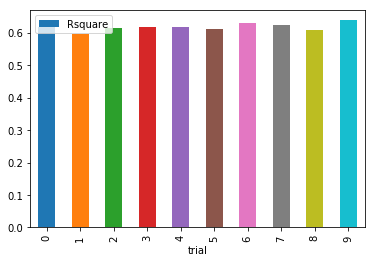

In [44]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))

    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

Yes, model passed cross-validation because the Rsquare are similar across different testing datasets